<a href="https://colab.research.google.com/github/vhugosv7/Graficas-Semin-Update/blob/main/Recomendation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Get all the genre averages
- The anime with the highest score and episodes
- Get a relation between score and episodes.


<Axes: title={'center': 'Top 10 lowest score'}, xlabel='episodes', ylabel='score'>

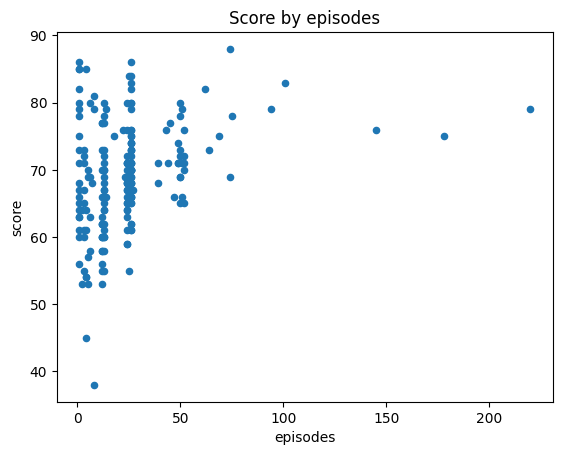

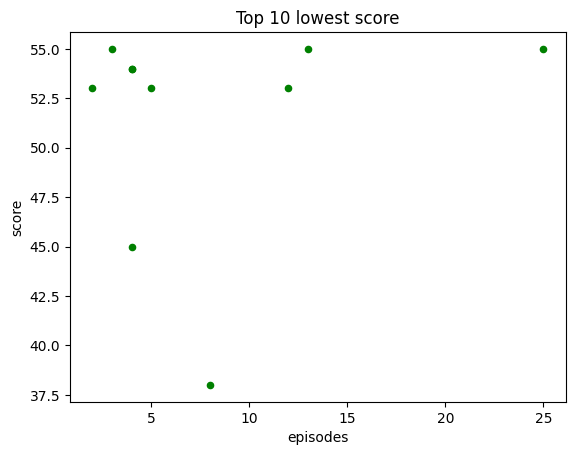

In [ ]:
import pandas as pd
df = pd.read_csv('anime_dataset.csv')
anime_genres = []

for genre in df['genres']:
    anime_genres.append(genre.split(','))


genre_list = [item for sublist in anime_genres for item in sublist]

# Get the socre by genre
df[df['genres'].str.contains('Adventure')].groupby(['genres'])['score'].mean()

df.plot(x='episodes', y='score', kind='scatter', title='Score by episodes')
df.nlargest(15, 'episodes').to_csv('test.csv')
smallest = df.nsmallest(10, 'score')
smallest.plot(x='episodes', y='score',
              kind='scatter', color='green', title='Top 10 lowest score')



In [ ]:
#  Get titles with a score greather than 80
score_greather = df[df['score']>80]

# Get specific columns
print(score_greather[['title', 'score', 'genres']].head(3).to_string())

                             title  score                                           genres
0                     Cowboy Bebop     86                 Action, Adventure, Drama, Sci-Fi
1  Cowboy Bebop: Tengoku no Tobira     82                   Action, Drama, Mystery, Sci-Fi
9                          MONSTER     88  Drama, Horror, Mystery, Psychological, Thriller


In [ ]:
# From article read

import pandas as pd

# Defining a custom function
def salary_range(x):
    return x.max() - x.min()

# Sample data
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'Finance', 'Finance'],
    'Employee': ['John', 'Emma', 'Steve', 'Mia', 'Tom', 'Sophia'],
    'Salary': [50000, 60000, 75000, 80000, 65000, 40000]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Applying multiple functions
result = df.groupby('Department')['Salary'].agg(['sum', 'mean', 'max','min','count', salary_range])
print(result)

print('------------------------------------------------')
# Grouping by multiple columns
result2 = df.groupby(['Department', 'Employee'])['Salary'].sum()
print(result2)

print('------------------------------------------------')
# Correct approach
result3 = df.groupby('Department').agg({
    'Salary': 'mean',       # Works on numerical data
    'Employee': 'count'     # Works on text to count entries
})
print(result3)

               sum     mean    max    min  count  salary_range
Department                                                    
Finance     105000  52500.0  65000  40000      2         25000
HR          110000  55000.0  60000  50000      2         10000
IT          155000  77500.0  80000  75000      2          5000
------------------------------------------------
Department  Employee
Finance     Sophia      40000
            Tom         65000
HR          Emma        60000
            John        50000
IT          Mia         80000
            Steve       75000
Name: Salary, dtype: int64
------------------------------------------------
             Salary  Employee
Department                   
Finance     52500.0         2
HR          55000.0         2
IT          77500.0         2
